In [1]:
# !conda install -c anaconda basemap
# !conda install -c conda-forge proj4
# !conda install -c anaconda scikit-learn
# !conda install -c anaconda pandas
# !conda install -c conda-forge scikit-learn-extra
!conda install -c conda-forge geopy

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
!conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
basemap                   1.3.2            py38hb079758_1    anaconda
basemap-data              1.3.2              pyhd3eb1b0_1    anaconda
blas                      1.0                         mkl    anaconda
bottleneck                1.3.4            py38hce1f21e_0    anaconda
brotlipy                  0.7.0           py38h27cfd23_1003  
c-ares                    1.18.1               h7f8727e_0    anaconda
ca-certificates           2022.07.19           h06a4308_0    anaconda
certifi                   2022.6.15        py38h06a4308_0    anaconda
cffi                      1.15.0           py38hd667e15_1  
charset-normalizer        2.0.4              pyhd3eb1b0_0  
colorama                  0.4.4              pyhd3eb1b0_0  
conda                     22.9.0      

In [12]:
#import libraries
#Library Imports
from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.neighbors
import scipy.stats
import numpy as np
import mpl_toolkits
import numpy as np
import math


In [5]:
#Loading Data
S_O_20 = pd.read_csv("Earthquake_2020_9_2020_10_filtered.csv")
N_D_20 = pd.read_csv("Earthquake_2020_11_2020_12_filtered.csv")
J_F_21 = pd.read_csv("Earthquake_2021_1_2021_2_filtered.csv")
M_A_21 = pd.read_csv("Earthquake_2021_3_2021_4_filtered.csv")
M_J_21 = pd.read_csv("Earthquake_2021_5_2021_6_filtered.csv")
J_A_21 = pd.read_csv("Earthquake_2021_7_2021_8_filtered.csv")
S_O_21 = pd.read_csv("Earthquake_2021_9_2021_10_filtered.csv")
N_D_21 = pd.read_csv("Earthquake_2021_11_2021_12_filtered.csv")
J_F_22 = pd.read_csv("Earthquake_2022_1_2022_2_filtered.csv")
M_A_22 = pd.read_csv("Earthquake_2022_3_2022_4_filtered.csv")
M_J_22 = pd.read_csv("Earthquake_2022_5_2022_6_filtered.csv")
J_A_22 = pd.read_csv("Earthquake_2022_7_2022_8_filtered.csv")



# Creating Sets for Pictures
set1 = [S_O_20, N_D_20, J_F_21]
set2 = [N_D_20, J_F_21, M_A_21]
set3 = [J_F_21, M_A_21, M_J_21]
set4 = [M_A_21, M_J_21, J_A_21]
set5 = [M_J_21, J_A_21, S_O_21]
set6 = [J_A_21, S_O_21, N_D_21]
set7 = [S_O_21, N_D_21, J_F_22]
set8 = [N_D_21, J_F_22, M_A_22]
set9 = [J_F_22, M_A_22, M_J_22]
set10 = [M_A_22, M_J_22, J_A_22]


Set1 = pd.concat(set1)
Set2 = pd.concat(set2)
Set3 = pd.concat(set3)
Set4 = pd.concat(set4)
Set5 = pd.concat(set5)
Set6 = pd.concat(set6)
Set7 = pd.concat(set7)
Set8 = pd.concat(set8)
Set9 = pd.concat(set9)
Set10 = pd.concat(set10)

KeyboardInterrupt: 

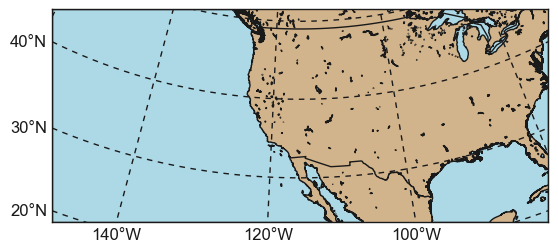

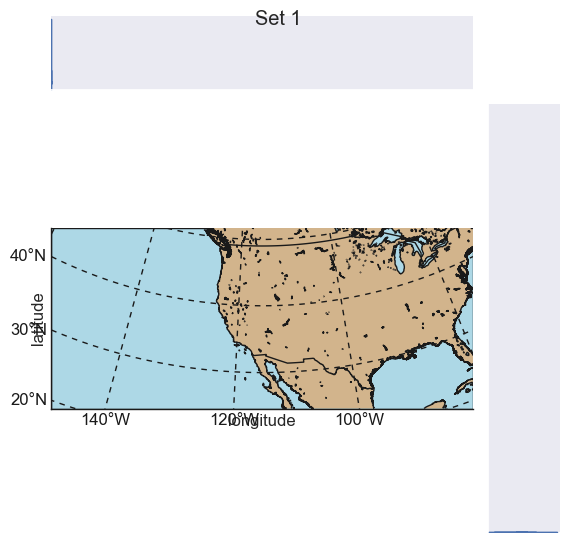

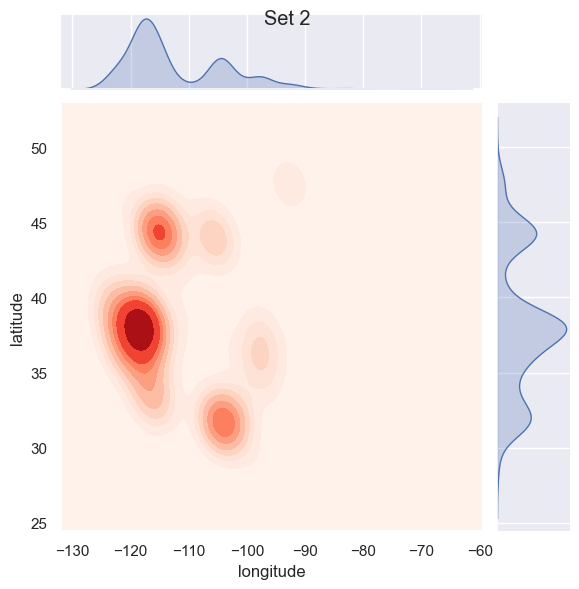

In [20]:
#Set up data

#Names and Lists
listCall = [Set1, Set2, Set3, Set4, Set5, Set6, Set7, Set8, Set9, Set10]
SetNames = ["Set 1", "Set 2", "Set 3", "Set 4", "Set 5", "Set 6", "Set 7","Set 8","Set 9","Set 10"]


def JointPlot(x,y):
    m = Basemap(projection='aea', width=7000000, height=3000000, resolution='h',lon_0= x[['longitude']].median(),lat_0= x[['latitude']].median())
    m.fillcontinents(color='tan',lake_color='lightblue')
    m.drawmapboundary(fill_color='lightblue')
    m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
    m.drawmeridians(range(0, 360, 20), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
    m.drawparallels(range(-90, 100, 10), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
    m.drawcoastlines()
    sns.set()
    df_all_den = x[['latitude', 'longitude']]
    sns.jointplot(x = "longitude",y = "latitude", data = df_all_den, kind="kde", fill = True, 
    cmap = "Reds", thresh = 0).fig.suptitle(y)


for i,t in enumerate(listCall):
    JointPlot(t,SetNames[i])



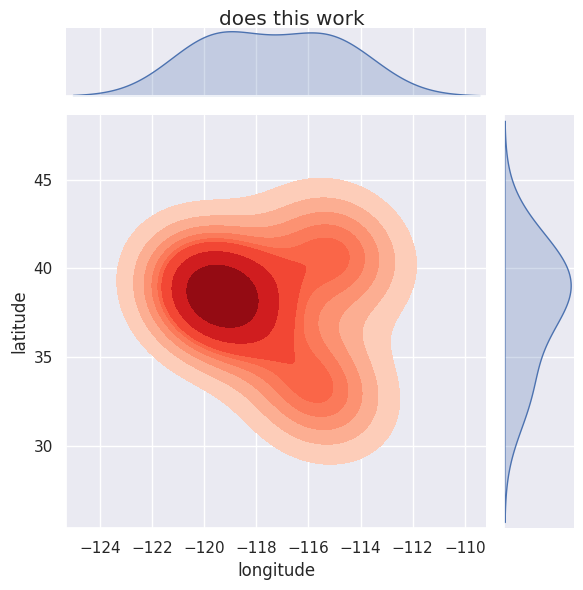

In [5]:
Set4copy = Set4
Set4copy = Set4[Set4['mag'] >= 4.7]
df2_all_den = Set4copy[['latitude', 'longitude']]
w = sns.jointplot(x = "longitude",y = "latitude", data = df2_all_den, kind="kde", fill = True, cmap = "Reds", thresh = 0)
w.fig.suptitle("does this work")
w.ax_joint.collections[0].set_alpha(0)
w.fig.tight_layout()
w.fig.subplots_adjust(top=0.95)

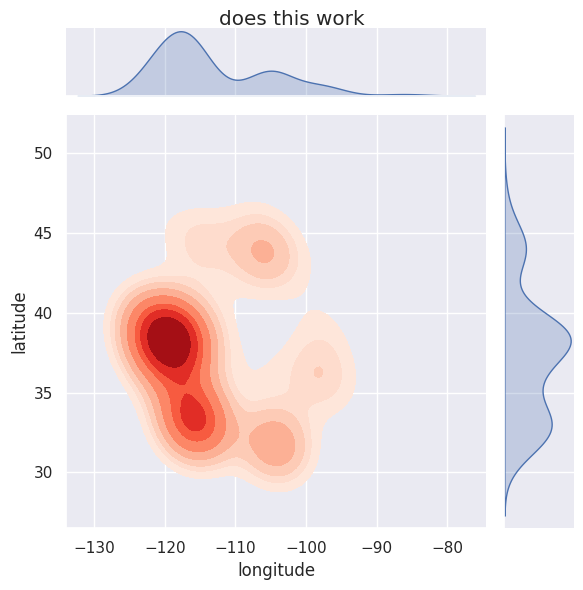

In [38]:
Set4copy = Set4[Set4['mag'] >= 3.5]
df3_all_den = Set4[['latitude', 'longitude']]
w = sns.jointplot(x = "longitude",y = "latitude", data = df3_all_den, kind="kde", fill = True, cmap = "Reds", thresh = 0)
w.fig.suptitle("does this work")
w.ax_joint.collections[0].set_alpha(0)
w.fig.tight_layout()
w.fig.subplots_adjust(top=0.95)

In [21]:
# set up the data grid for the contour plot

ktest= Set1[['latitude', 'longitude']]

xgrid25 = np.sort(list(ktest['longitude']))
ygrid25 = np.sort(list(ktest['latitude']))
x25, y25 = np.meshgrid(xgrid25, ygrid25)
print("X Grid Component:\n{}\n".format(x25))
print("Y Grid Component:\n{}\n".format(y25))
xy25 = np.vstack([y25.ravel(), x25.ravel()]).T



X Grid Component:
[[-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 ...
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]]

Y Grid Component:
[[28.4727    28.4727    28.4727    ... 28.4727    28.4727    28.4727   ]
 [28.5067749 28.5067749 28.5067749 ... 28.5067749 28.5067749 28.5067749]
 [28.5638    28.5638    28.5638    ... 28.5638    28.5638    28.5638   ]
 ...
 [48.3456    48.3456    48.3456    ... 48.3456    48.3456    48.3456   ]
 [48.7652    48.7652    48.7652    ... 48.7652    48.7652    48.7652   ]
 [48.8828    48.8828    48.8828    ... 48.8828    48.

In [22]:
# construct kernel density estimate of distribution

kde25 = sklearn.neighbors.KernelDensity(
    bandwidth=0.05, 
    metric='minkowski',
    kernel='gaussian', 
    algorithm='ball_tree'
)
kde25.fit(ktest.values)

KernelDensity(algorithm='ball_tree', bandwidth=0.05, metric='minkowski')

In [23]:
log_density = kde25.score_samples(xy25)
density = np.exp(log_density)
density = density.reshape(x25.shape)
print("Shape of Density Values:\n{}\n".format(density.shape))

Shape of Density Values:
(1654, 1654)



In [1]:
import mpl_toolkits.basemap


fig15 = plt.figure(figsize=(15, 15))
fig15.suptitle(
    """
    Density Estimation:
    Location of Earthquakes within the US
    With Magnitude >= 2.5
    """, 
    fontsize=10
)

the_map = mpl_toolkits.basemap.Basemap(
    projection='cyl',
    llcrnrlat=y25.min(), urcrnrlat=y25.max(),
    llcrnrlon=x25.min(),urcrnrlon=x25.max(),
    resolution='c'
)

the_map.drawcoastlines(linewidth=1)
the_map.drawcountries(linewidth=1)
the_map.drawstates(linewidth=1)

levels = np.linspace(0, density.max(), 25)
plt.contourf(x25, y25, density, levels=levels, cmap=plt.cm.Reds)

plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [16]:
fig15 = plt.figure(figsize=(15, 15))
fig15.suptitle(
    """
    Density Estimation:
    Location of Earthquakes within the US
    With Magnitude >= 2.5
    """, 
    fontsize=10
)

the_map = mpl_toolkits.basemap.Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,\
            llcrnrlon=-130,urcrnrlon=-60,lat_ts=20,resolution='c')


the_map.drawcoastlines(linewidth=1)
the_map.drawcountries(linewidth=1)
the_map.drawstates(linewidth=1)

# draw parallels and meridians.
the_map.drawparallels(np.arange(-90.,91.,30.))
the_map.drawmeridians(np.arange(-180.,181.,60.))

the_map.fillcontinents(color='coral',lake_color='aqua')
the_map.drawmapboundary(fill_color='aqua')


levels = np.linspace(0, density.max(), 25)
plt.contourf(x25, y25, density, levels=levels, cmap=plt.cm.Reds)

plt.show()


AttributeError: module 'mpl_toolkits' has no attribute 'basemap'

<Figure size 1500x1500 with 0 Axes>

https://github.com/mandjo2010/HotSpotAnalysis/blob/master/.ipynb_checkpoints/Hot%20Spote%20and%20Outliers%20Analysis-checkpoint.ipynb

Number of clusters: 12


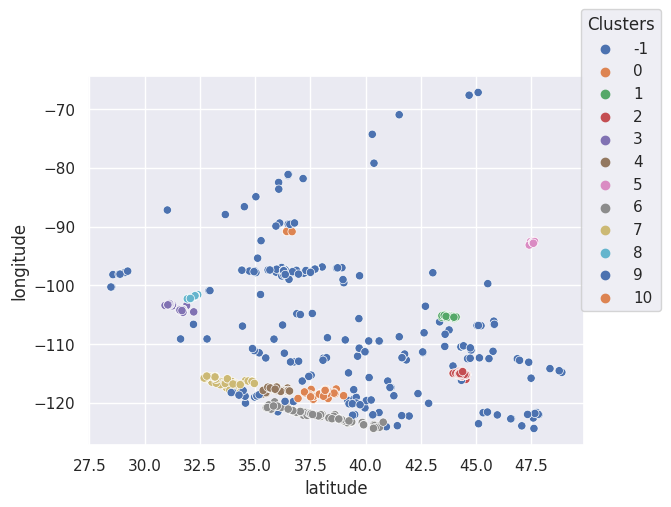

Counter({0: 363, 7: 288, -1: 238, 2: 223, 3: 149, 6: 148, 4: 80, 9: 56, 1: 46, 5: 24, 8: 23, 10: 16})
<class 'pandas.core.series.Series'>


In [23]:
# DBSCAN clustering

import sklearn
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# clustering

"""
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(Set1[['latitude', 'longitude']])
distances, indices = neighbors_fit.kneighbors(Set1[['latitude', 'longitude']])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
"""

epsilon = .65
MinPts = 16

db = DBSCAN(eps = epsilon, min_samples = MinPts).fit(Set1[['latitude', 'longitude']])
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([Set1[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

# show cluster

p = sns.scatterplot(data=Set1[['latitude', 'longitude']], x="latitude", y="longitude", hue=cluster_labels, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

print(Counter(cluster_labels))
print(type(clusters))

                         time   latitude   longitude  depth   mag
30   2020-09-04T14:24:44.100Z  34.087833 -116.853667   1.90  3.14
107  2020-09-15T00:22:39.300Z  34.059167 -117.187000  13.72  2.69
112  2020-09-15T15:09:21.480Z  33.985333 -116.686833  16.32  2.91
135  2020-09-19T11:38:24.290Z  33.442500 -116.446167   9.66  2.57
142  2020-09-20T02:51:09.680Z  34.565167 -116.241000   2.94  2.84
..                        ...        ...         ...    ...   ...
302  2021-02-10T07:57:14.760Z  33.182833 -115.607500   3.20  2.72
372  2021-02-22T00:28:10.410Z  33.997667 -116.808333   9.83  3.19
380  2021-02-23T12:21:48.400Z  32.696000 -115.798833  11.10  2.64
387  2021-02-24T16:55:36.910Z  32.813500 -115.461667  13.54  3.05
431  2021-02-28T20:12:49.320Z  34.326167 -116.923500   5.51  2.94

[288 rows x 5 columns]


Text(0.5, 0.98, 'Set1')

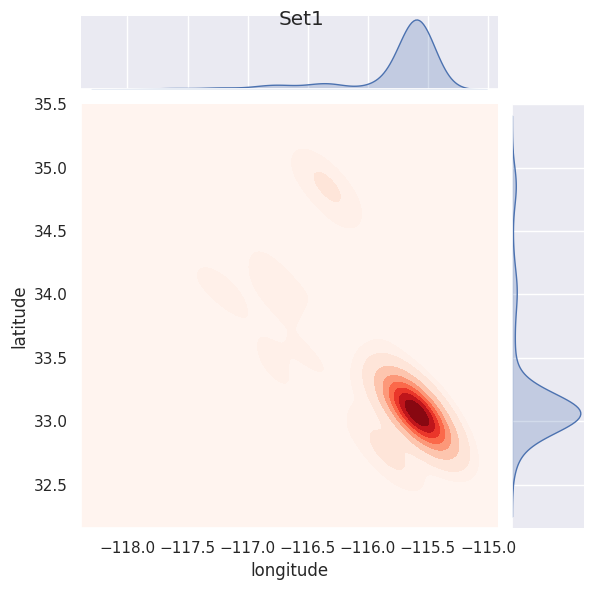

In [41]:
sns.set()
dataset = clusters[7]
#[['latitude', 'longitude']]
print(dataset)
sns.jointplot(x = "longitude",y = "latitude", data = dataset, kind="kde", fill = True, 
cmap = "Reds", thresh = 0).fig.suptitle('Set1')

In [54]:
print(Center(clusters[1]))

print(DistCenter(clusters[1], 43.7343, -105.3359))

(43.73434565217392, -105.33594782608695)


TypeError: cannot convert the series to <class 'float'>

In [104]:
#try to get center point

from geopy.distance import great_circle
from shapely.geometry import MultiPoint

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = get_centermost_point(clusters)


AssertionError: 

Number of clusters: 24


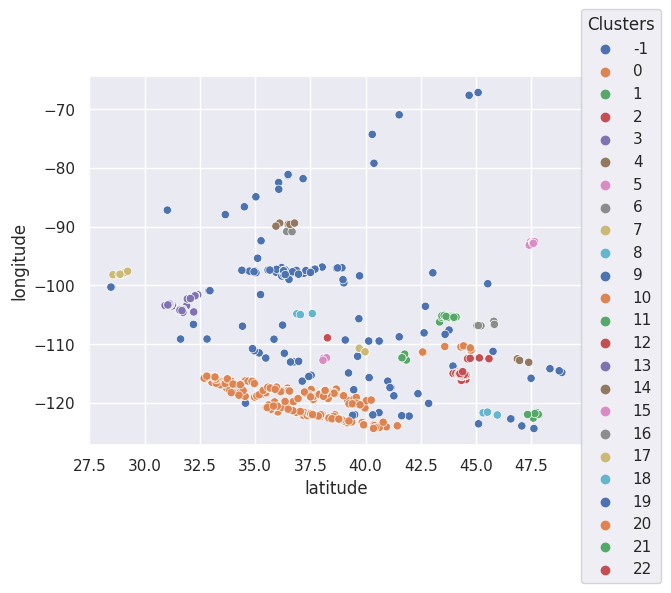

Counter({0: 911, 2: 224, 3: 149, -1: 84, 9: 76, 1: 47, 5: 24, 13: 23, 16: 16, 10: 14, 6: 13, 7: 9, 8: 9, 11: 7, 4: 6, 14: 6, 15: 6, 12: 5, 20: 5, 21: 4, 17: 4, 18: 4, 19: 4, 22: 4})
Number of clusters: 26


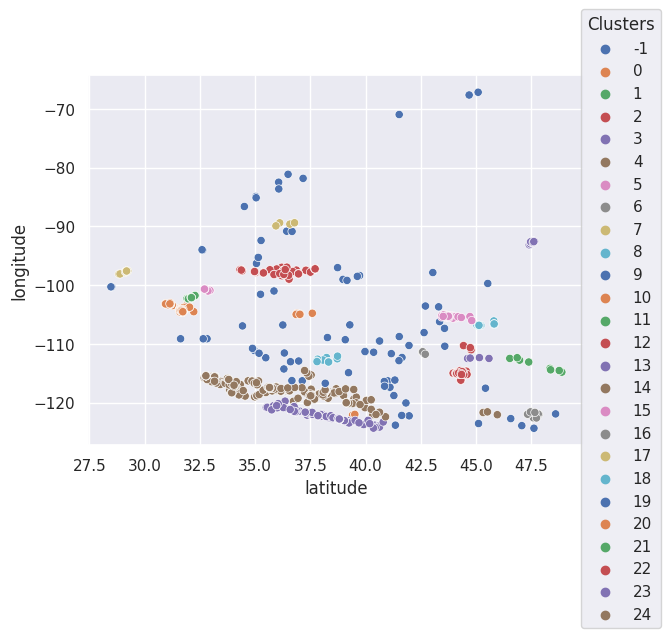

Counter({4: 547, 2: 205, 0: 179, 3: 147, -1: 87, 12: 85, 5: 64, 13: 32, 11: 25, 8: 15, 18: 11, 7: 10, 10: 10, 6: 9, 15: 9, 16: 6, 1: 5, 22: 5, 17: 5, 9: 4, 14: 4, 21: 4, 23: 4, 19: 4, 20: 4, 24: 4})
Number of clusters: 28


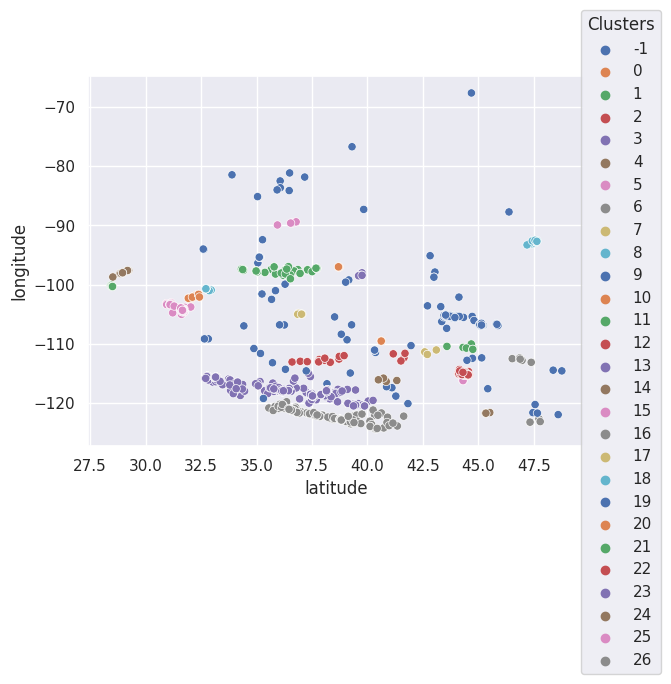

Counter({3: 514, 5: 232, 6: 155, 2: 117, 9: 86, -1: 70, 1: 68, 8: 34, 0: 28, 22: 15, 19: 12, 4: 11, 18: 11, 21: 9, 13: 8, 11: 7, 17: 7, 23: 7, 7: 5, 12: 5, 15: 5, 16: 5, 20: 5, 24: 5, 10: 4, 14: 4, 25: 4, 26: 4})
Number of clusters: 28


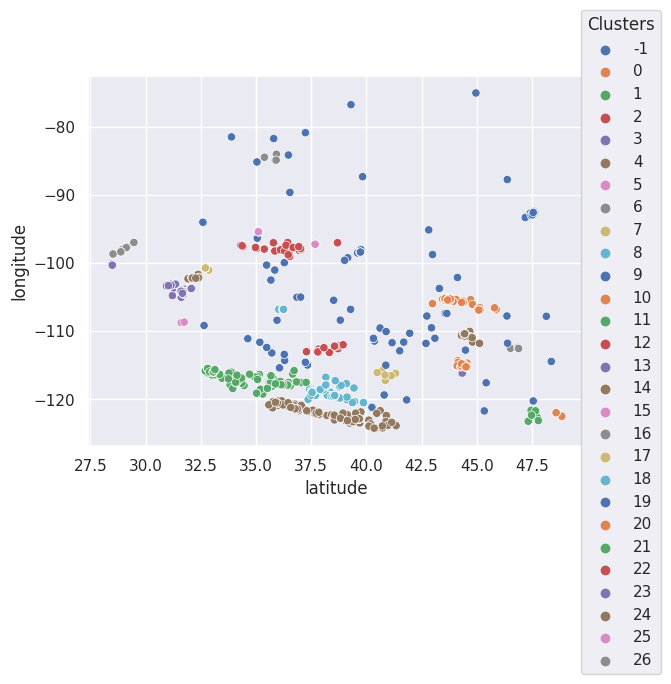

Counter({8: 405, 1: 283, 3: 254, 4: 170, 10: 92, 0: 91, -1: 71, 2: 42, 9: 33, 24: 30, 14: 26, 5: 23, 6: 15, 12: 14, 19: 13, 17: 9, 23: 9, 7: 8, 15: 8, 18: 7, 21: 7, 20: 6, 11: 5, 13: 5, 25: 5, 16: 4, 22: 4, 26: 4})
Number of clusters: 25


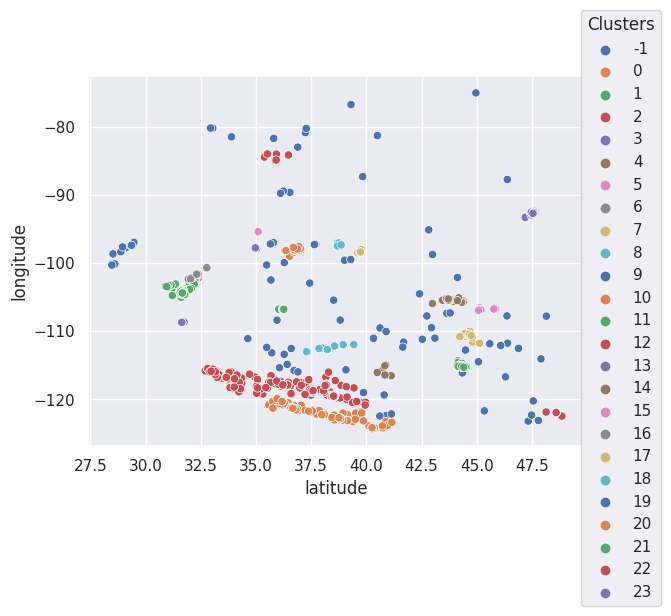

Counter({2: 691, 1: 293, 0: 142, 11: 102, -1: 84, 4: 61, 6: 35, 17: 35, 3: 28, 15: 23, 20: 21, 5: 19, 10: 14, 19: 14, 9: 13, 7: 12, 18: 10, 16: 9, 21: 8, 8: 7, 23: 7, 12: 6, 14: 6, 22: 6, 13: 4})
Number of clusters: 26


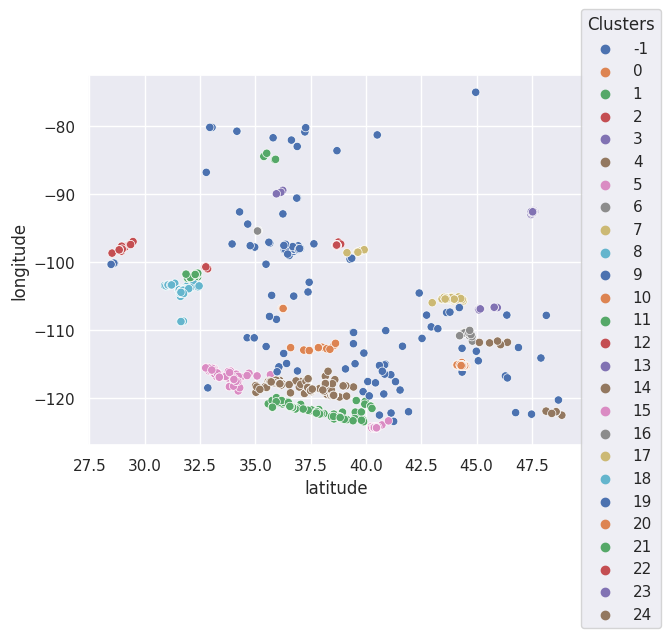

Counter({4: 434, 8: 295, 1: 141, 0: 123, -1: 96, 5: 73, 7: 70, 15: 69, 11: 36, 22: 32, 6: 30, 9: 26, 13: 20, 16: 19, 3: 17, 12: 16, 20: 14, 17: 13, 2: 9, 10: 7, 14: 7, 18: 7, 19: 7, 24: 5, 21: 4, 23: 4})
Number of clusters: 25


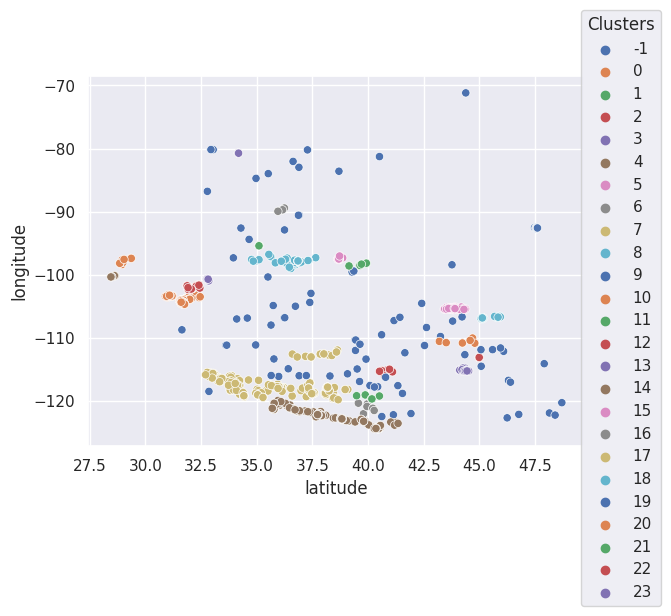

Counter({0: 309, 7: 266, 4: 188, 3: 120, -1: 89, 5: 72, 12: 43, 15: 39, 8: 38, 18: 23, 17: 18, 9: 15, 13: 11, 10: 10, 20: 10, 6: 8, 21: 8, 1: 7, 14: 7, 2: 6, 11: 5, 22: 5, 23: 5, 16: 4, 19: 4})
Number of clusters: 30


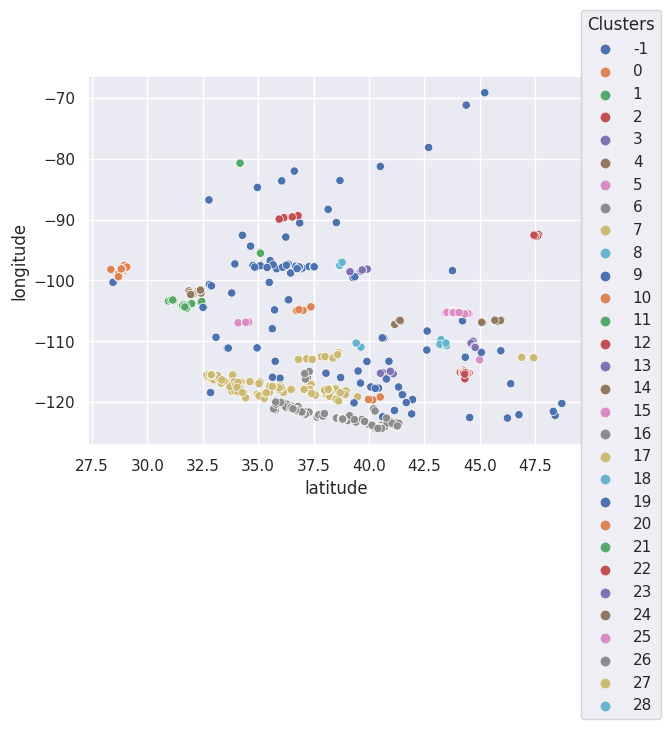

Counter({1: 307, 7: 231, 6: 198, 5: 92, -1: 80, 2: 78, 8: 40, 14: 37, 9: 32, 4: 25, 10: 24, 17: 14, 22: 14, 13: 9, 19: 7, 0: 6, 11: 6, 23: 6, 3: 5, 15: 5, 21: 5, 26: 5, 27: 5, 12: 4, 28: 4, 16: 4, 18: 4, 20: 4, 24: 4, 25: 4})
Number of clusters: 26


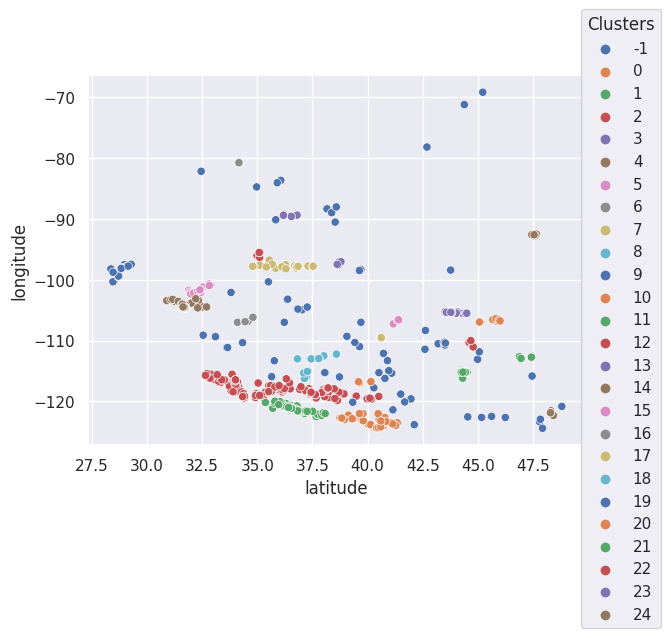

Counter({4: 359, 2: 253, 0: 85, 3: 81, -1: 72, 1: 65, 5: 46, 11: 43, 7: 31, 19: 23, 10: 19, 14: 14, 13: 12, 8: 9, 6: 8, 22: 8, 12: 6, 17: 6, 18: 6, 21: 6, 9: 5, 16: 5, 15: 4, 20: 4, 24: 4, 23: 4})
Number of clusters: 29


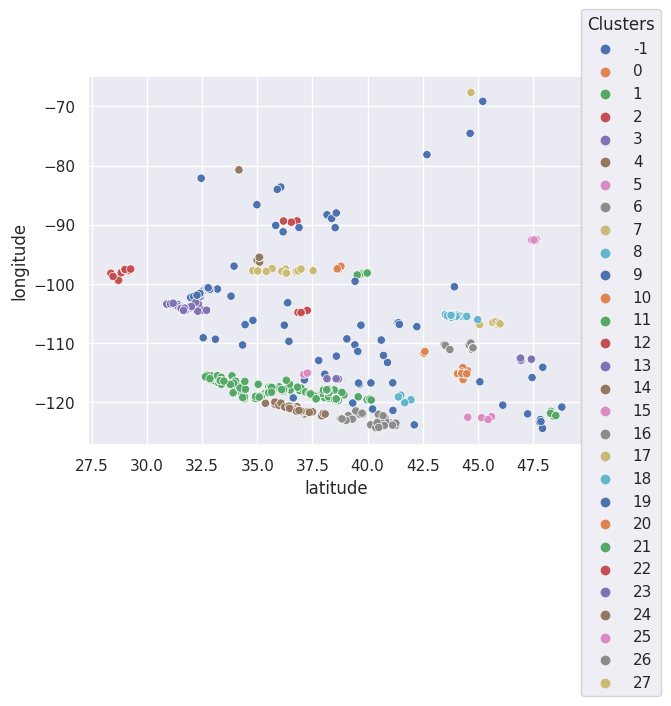

Counter({3: 385, 1: 239, 6: 73, -1: 64, 8: 64, 4: 56, 9: 47, 0: 44, 23: 30, 12: 28, 17: 17, 7: 13, 16: 12, 14: 8, 5: 7, 13: 7, 11: 6, 24: 6, 2: 5, 10: 5, 18: 5, 19: 5, 21: 5, 15: 4, 25: 4, 20: 4, 22: 4, 26: 4, 27: 4})


In [36]:
def DBCluster(x,y):
    epsilon = .75
    MinPts = 4

    #cluster
    df_all_den = x[['latitude', 'longitude']]
    db = DBSCAN(eps = epsilon, min_samples = MinPts).fit(df_all_den)
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))
    clusters = pd.Series([df_all_den[cluster_labels == n] for n in range(num_clusters)])
    print('Number of clusters: {}'.format(num_clusters))

    # show cluster
    p = sns.scatterplot(data=df_all_den[['latitude', 'longitude']], x="latitude", y="longitude", hue=cluster_labels, legend="full", palette="deep")
    sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
    plt.show()

    print(Counter(cluster_labels))

for i,t in enumerate(listCall):
    DBCluster(t,SetNames[i])

[[  35.9658333 -117.9123333]
 [  32.1038    -102.14     ]
 [  33.0546667 -115.5906667]
 [  44.32      -115.0595   ]
 [  34.0711667 -116.7215   ]
 [  38.1545    -118.0891   ]
 [  38.1696    -117.8513   ]
 [  38.6110001 -122.0333328]]


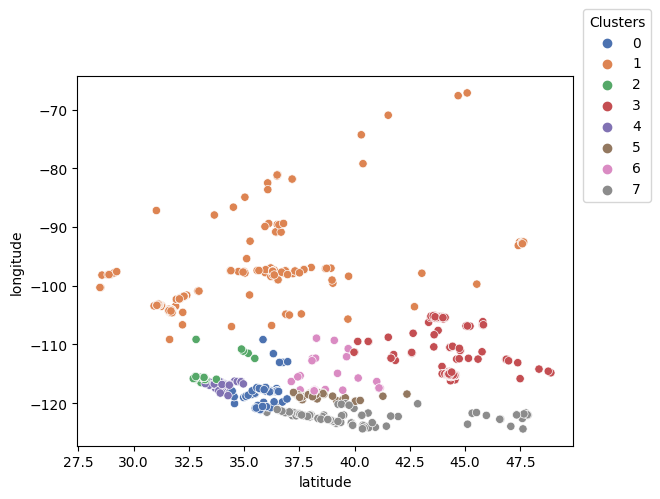

In [24]:
#kMedoids clustering

from sklearn_extra.cluster import KMedoids

pam = KMedoids(metric= 'manhattan', random_state=0).fit(Set1[['latitude', 'longitude']])

pam_cluster_centers = pam.cluster_centers_
print(pam_cluster_centers)

p = sns.scatterplot(data=Set1[['latitude', 'longitude']], x="latitude", y="longitude", hue=pam.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [53]:
 #Storing the clusters
#Store the center of the clusters 
#Store the average distance from center of the cluster
#Store the average magnitude of the values in the cluster


#Create Test Subject
PDataset = Set1.iloc[1:10,:]
print(PDataset)



def Center(x):
    meanLat = x['latitude'].mean()
    meanLong = x['longitude'].mean()
    return meanLat, meanLong

#sqrt(lat^2 + long^2)
#Get cluster one values and run this
#Did this since its computationally faster than trying to find the area and if it
# increases the cluster is growing if it decreases the cluster size is shrinking 
def DistCenter(x, Lat, Long):
    distance = 0 
    for idx in x.index:
        LatDist = x["latitude"][idx]-Lat
        LongDist = x["longitude"][idx]-Long
        #print(LatDist, " ", LongDist)
        distance =  distance + math.sqrt(math.pow(LatDist,2) + math.pow(LongDist,2))
    distance = distance/idx
    return distance

# def MagnitudeOfCL(x):
#     #Get the magnitude value of the Clusters

[c,d] = Center(PDataset)
print(c , " ", d)
print(DistCenter(PDataset, c, d))










                       time   latitude  longitude  depth   mag
1  2020-09-01T00:36:59.811Z  38.003900  -118.2358   6.60  3.40
2  2020-09-01T01:39:34.960Z  36.394333  -120.4370   9.19  2.87
3  2020-09-01T02:25:49.130Z  42.370000  -118.4440   8.45  3.52
4  2020-09-01T05:51:36.757Z  38.179800  -117.8634   9.20  3.30
5  2020-09-01T08:51:26.458Z  38.175900  -117.8014   5.80  2.80
6  2020-09-01T09:08:48.644Z  43.779900  -107.6074  10.00  2.80
7  2020-09-01T16:56:23.593Z  38.200200  -117.7724  10.00  2.50
8  2020-09-01T18:59:44.436Z  43.801700  -105.5253   0.00  3.30
9  2020-09-01T20:02:10.047Z  44.477200  -115.2000  13.23  3.20
40.375881477777774   -115.43185555555556
5.1676671627910515


In [ ]:
## Animation Theoretical Code
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

# let p be a polygon obtained after clustering
# let polygonList be a list of polygons obtained after clustering
# these should apply to just one window, need to run second loop for sliding window?

fig15 = plt.figure(figsize=(15, 15))
fig15.suptitle(
    """
    Window Number 1
    """, 
    fontsize=10
)

the_map = mpl_toolkits.basemap.Basemap(projection='merc',llcrnrlat=20,urcrnrlat=60,\
            llcrnrlon=-130,urcrnrlon=-60,lat_ts=20,resolution='c')


the_map.drawcoastlines(linewidth=1)
the_map.drawcountries(linewidth=1)
the_map.drawstates(linewidth=1)

# draw parallels and meridians.
the_map.drawparallels(np.arange(-90.,91.,30.))
the_map.drawmeridians(np.arange(-180.,181.,60.))

the_map.fillcontinents(color='coral',lake_color='aqua')
the_map.drawmapboundary(fill_color='aqua')

for i in polygonList:
    poly = Polygon(p,facecolor='red',edgecolor='green',linewidth=3)
    plt.gca().add_patch(poly)

levels = np.linspace(0, density.max(), 25)
plt.contourf(x25, y25, density, levels=levels, cmap=plt.cm.Reds)

plt.show()

https://stackoverflow.com/questions/36989565/how-to-manually-set-k-means-clusters-centers

In [42]:
#saim VVVV
dbscan_data = Set1[['latitude','longitude']]
dbscan_data = dbscan_data.values.astype('float32', copy = False)
dbscan_data 

array([[  38.1765  , -117.8019  ],
       [  38.0039  , -118.2358  ],
       [  36.394333, -120.437   ],
       ...,
       [  36.363167,  -98.155334],
       [  31.688448, -104.300804],
       [  38.1694  , -117.8986  ]], dtype=float32)

In [45]:
from sklearn.preprocessing import StandardScaler

dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[ 0.09801376, -0.57577926],
       [ 0.05939221, -0.6285406 ],
       [-0.30076998, -0.89620197],
       ...,
       [-0.30774382,  1.8132086 ],
       [-1.3537756 ,  1.0659304 ],
       [ 0.09642522, -0.58753717]], dtype=float32)

In [58]:
model1 = DBSCAN(eps=.25, min_samples=64, metric='euclidean').\
    fit(dbscan_data)
model1

DBSCAN(eps=0.25, min_samples=64)

In [59]:
outliers_df = Set1[model1.labels_ == -1]
clusters_df = Set1[model1.labels_ != -1]
model1.labels_

array([ 0,  0,  0, ..., -1,  2,  0])

In [60]:
colors = model1.labels_
colors_cluster = colors[colors != -1]
color_outliers = 'white'

In [61]:
clusters1 = Counter(model1.labels_)
print(clusters1)
print(Set1[model1.labels_ == -1].head())
print('number of clusters: {}'.format(len(clusters1)-1))

Counter({0: 900, -1: 355, 1: 227, 2: 172})
                        time  latitude  longitude  depth   mag
3   2020-09-01T02:25:49.130Z   42.3700  -118.4440   8.45  3.52
6   2020-09-01T09:08:48.644Z   43.7799  -107.6074  10.00  2.80
8   2020-09-01T18:59:44.436Z   43.8017  -105.5253   0.00  3.30
21  2020-09-03T06:52:01.433Z   46.8927  -112.5452  10.00  2.50
22  2020-09-03T15:07:53.153Z   31.0271   -87.1846   4.00  3.80
number of clusters: 3


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


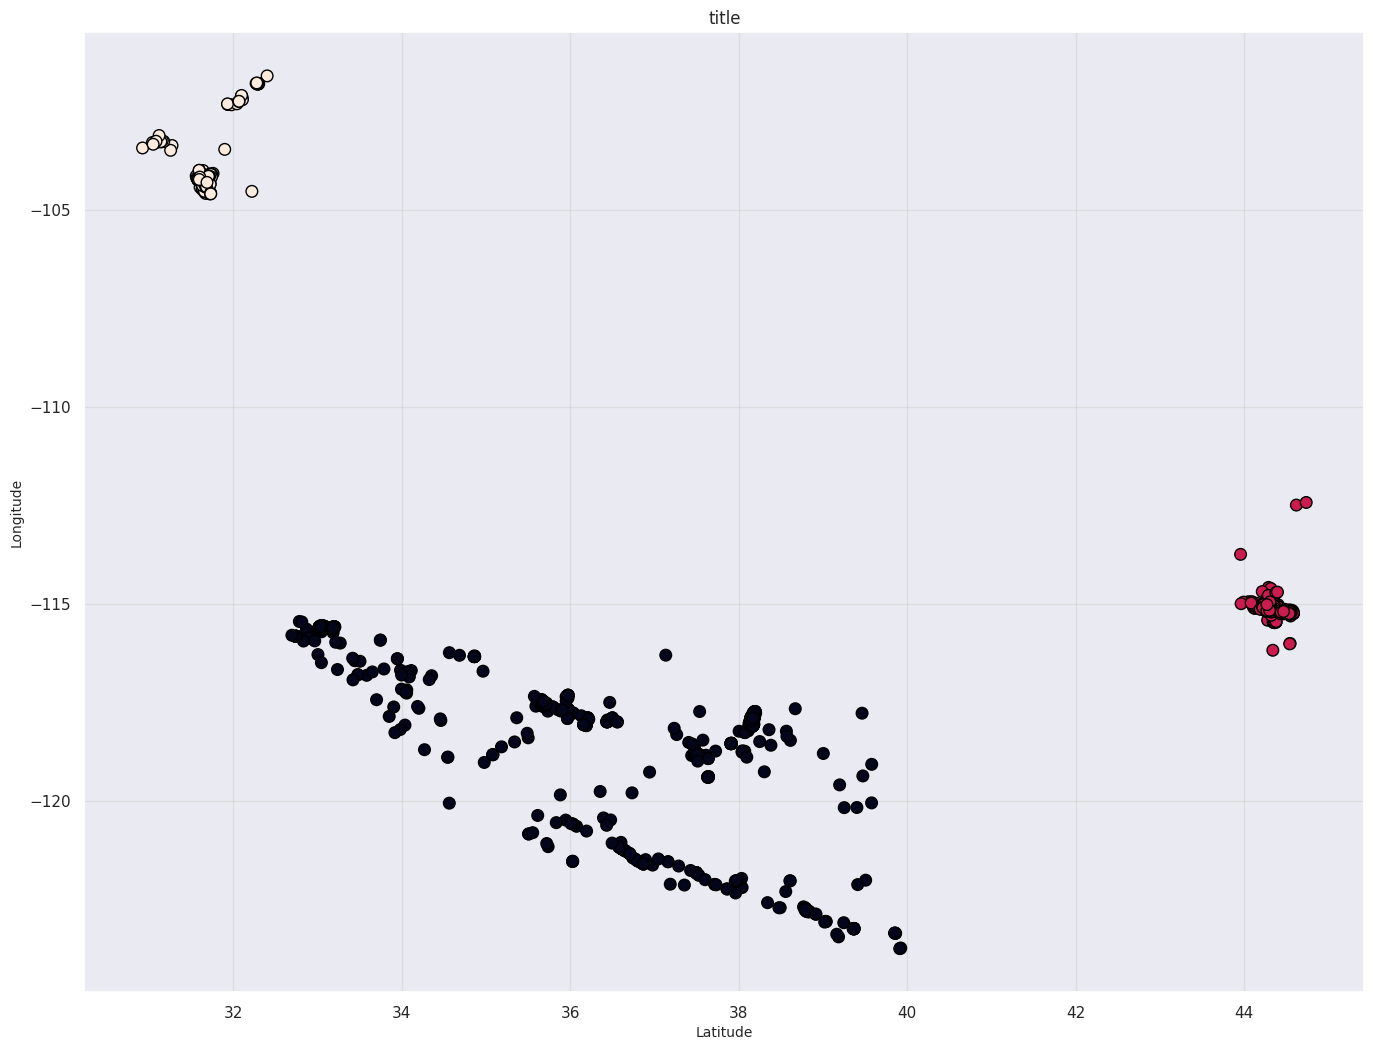

In [62]:
#Saim ^^^^^
fig = plt.figure()

ax = fig.add_axes([.2,.2,2,2])

ax.scatter(clusters_df['latitude'], clusters_df['longitude'],
          c=colors_cluster, edgecolors='black',s=70)
#ax.scatter(outliers_df['latitude'], outliers_df['longitude'],
      #    c=color_outliers, edgecolors='black',s=30)

ax.set_xlabel('Latitude', family='Arial', fontsize=10)
ax.set_ylabel('Longitude', family='Arial', fontsize=10)

plt.title('title',family='Arial',fontsize=12)

plt.grid(which='major',color='#cccccc', alpha=0.45)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e46fac08-ee0a-47ea-aeaa-8539d5084716' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>